In [1]:
import plotly.graph_objs as go
import numpy as np
#from ipywidgets import interact, interactive
from ipywidgets import widgets
from IPython.display import display
import plotly.io as pio
pio.renderers.default = "browser"

aSlider = widgets.FloatSlider(
    value=2.0,
    min=1.0,
    max=4.0,
    step=0.01,
    description='a:',
    continuous_update=False
)

bSlider = widgets.FloatSlider(
    value=1.0,
    min=0.0,
    max=10.0,
    step=0.01,
    description='b:',
    continuous_update=True
)

colorDropdown = widgets.Dropdown(
    description='Color:',
    value='blue',
    options=['red', 'blue', 'green']
)

fig = go.FigureWidget()
#fig.show()
scattf = fig.add_scatter()
scatt = scattf.data[-1]

xs=np.linspace(0, 6, 100)

def response(change):
    with fig.batch_update():
        fig.data[0].x=xs
        fig.data[0].y=np.sin(aSlider.value*xs-bSlider.value)
        fig.data[0].line.color=colorDropdown.value
        fig.layout.xaxis.title = 'whatever'

aSlider.observe(response, names="value")
bSlider.observe(response, names="value")
colorDropdown.observe(response, names="value")

response("doesn't matter what I send here, just triggering") # MUST be before widgets.VBox - if response(x) is last, NOTHING is drawn! 

widgets.VBox([aSlider,
              bSlider,
              colorDropdown,
              fig])

In [2]:
import plotly.graph_objs as go
import numpy as np
#from ipywidgets import interact, interactive
from ipywidgets import widgets
from IPython.display import display
from scipy.integrate import odeint
import plotly.io as pio
pio.renderers.default = "browser"

def dxdt(x,t,k1,k2,e0,a):
    return k1*a*(e0-x) - k2*x

x0 = 0
e0, a = 0.001, 1.
k1_init, k2_init = 0.3, 0.1

t = np.arange(0,10,0.01)
sol = odeint(dxdt, x0, t, args=(k1_init, k2_init, e0, a))
sol = np.concatenate(sol)
enz_conc_init = e0 - sol
# print(sol)

def fun(t,k1,k2,e0,a):
    sol = odeint(dxdt, x0, t, args=(k1, k2, e0, a))
    sol = np.concatenate(sol)
    enz_conc = e0 - sol
    return enz_conc

fig = go.FigureWidget()
#fig.show()
scattf = fig.add_scatter()
scatt = scattf.data[0]

k1_Slider = widgets.FloatSlider(
    value=0.3,
    min=0.1,
    max=2,
    step=0.01,
    description='k1 value: ',
    continuous_update=False
)

k2_Slider = widgets.FloatSlider(
    value=0.1,
    min=0.0,
    max=2,
    step=0.01,
    description='k2 value: ',
    continuous_update=True
)

colorDropdown = widgets.Dropdown(
    description='Color:',
    value='blue',
    options=['red', 'blue', 'green']
)


def response(change):
    with fig.batch_update():
        k1 = k1_Slider.value
        k2 = k2_Slider.value
        fig.data[0].x = t
        fig.data[0].y = fun(t,k1,k2,e0,a)
        fig.data[0].line.color = colorDropdown.value
        fig.layout.xaxis.title = 'Michaelis-Menten equation' 

k1_Slider.observe(response, names = "value")
k2_Slider.observe(response, names = "value")
colorDropdown.observe(response, names = "value")

response("change") # MUST be before widgets.VBox - if response(x) is last, NOTHING is drawn! 

widgets.VBox([k1_Slider,
              k2_Slider,
              colorDropdown,
              fig])

0

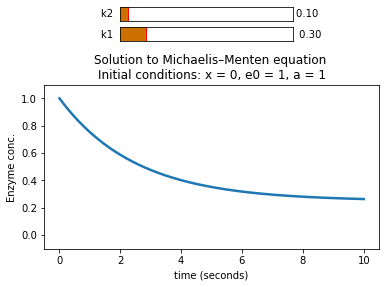

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.widgets import Slider

def dxdt(t,x,k1,k2,e0,a):
    return k1*a*(e0-x) - k2*x

"""
Params:
    tf: final time (sec)
    x0: Initial x
    t0: Initial t
    h:step size
"""
def rk4(tf,x0,t0,h,k1,k2,e0,a):
    
    n = (int)((tf - t0)/h)
    x = x0
    x_hist = []
    t_hist = []
    
    for i in range(1, n+1):
        
        x_hist.append(x)
        t_hist.append(i)
              
        c1 = h * dxdt(t0, x, k1,k2,e0,a)
        c2 = h * dxdt(t0 + 0.5 * h, x + 0.5 * c1, k1,k2,e0,a)
        c3 = h * dxdt(t0 + 0.5 * h, x + 0.5 * c2, k1,k2,e0,a)
        c4 = h * dxdt(t0 + h, x + c3, k1,k2,e0,a)
        
        x = x + (1.0 / 6.0)*(c1 + 2 * c2 + 2 * c3 + c4)
        t0 = t0 + h
        
        
    return np.array(x_hist), np.array(t_hist)

x0 = 0
e0, a = 1., 1.
k1_init, k2_init = 0.3, 0.1

def fun(tf,k1,k2,e0,a):
    sol, ts = rk4(tf,x0,0,1e-2,k1,k2,e0,a)
    enz_conc = e0 - sol
    return enz_conc, ts


tf = 10
sol, ts = rk4(tf,x0,0,1e-2,k1_init, k2_init, e0, a)
enz_conc_init = e0 - sol
ts = ts/100 #scale down the time by 100 since step size is taken as 0.01

fig = plt.figure(figsize=(6, 4))
ax = fig.add_subplot(111)
fig.subplots_adjust(bottom=0.13, top=0.70)

ax_k1 = fig.add_axes([0.3, 0.85, 0.4, 0.05])
ax_k1.spines['top'].set_visible(True)
ax_k1.spines['right'].set_visible(True)
ax_k2 = fig.add_axes([0.3, 0.92, 0.4, 0.05])
ax_k2.spines['top'].set_visible(True)
ax_k2.spines['right'].set_visible(True)

s_k1 = Slider(ax=ax_k1, label='k1 ', valmin=0, valmax=2.0,
              valinit=k1_init ,valfmt=' %1.2f ', facecolor='#cc7000')
s_k2 = Slider(ax=ax_k2, label ='k2 ', valmin=0, valmax=2.0, 
              valinit=k2_init,valfmt='%1.2f ', facecolor='#cc7000')

f_d, = ax.plot(ts , enz_conc_init, linewidth=2.5)
ax.set_xlabel("time (seconds)")
ax.set_ylabel("Enzyme conc.")
ax.set_ylim(-0.1,1.1)
ax.set_title("Solution to Michaelis–Menten equation \nInitial conditions: x = 0, e0 = 1, a = 1")

def update(val):
    k1 = s_k1.val
    k2 = s_k2.val
    f_d.set_data(ts , fun(tf,k1,k2,e0,a)[0])
    fig.canvas.draw_idle()
    
s_k1.on_changed(update)
s_k2.on_changed(update)